In [29]:
# Install necessary dependencies
!pip install tensorflow matplotlib

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [32]:
# Explore the dataset
print("Training set:")
print("Number of images:", len(train_images))
print("Shape of images:", train_images.shape[1:])
print("Number of unique classes:", len(np.unique(train_labels)))

Training set:
Number of images: 50000
Shape of images: (32, 32, 3)
Number of unique classes: 10


In [33]:
# Count the number of data entries for each class
unique_classes, counts = np.unique(train_labels, return_counts=True)
class_counts = dict(zip(unique_classes, counts))
print("Number of data entries for each class:", class_counts)

Number of data entries for each class: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


In [34]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [35]:
# Define the base model (VGG16) without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [36]:
# Freeze the convolutional base
base_model.trainable = False

In [37]:
# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [38]:
# Combine the base model and custom head to create a new model
model = Model(inputs=base_model.input, outputs=predictions)

In [39]:
# Explain the inputs and outputs of the modified model
print("Modified Model Summary:")
print(model.summary())

Modified Model Summary:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None,

In [40]:
# Explanation of inputs and outputs:
print("\nExplanation:")
print("Input shape:", base_model.input_shape)  # Input shape of the base model
print("Output shape:", predictions.shape)  # Output shape of the custom detection head


Explanation:
Input shape: (None, 32, 32, 3)
Output shape: (None, 10)


In [41]:
# Specify training parameters
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'sparse_categorical_crossentropy'
batch_size = 32
epochs = 10

In [42]:
# Compile the model with specified optimizer and loss function
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.3933 - accuracy: 0.5159 - val_loss: 1.2482 - val_accuracy: 0.5617
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2014 - accuracy: 0.5792 - val_loss: 1.2014 - val_accuracy: 0.5802
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1448 - accuracy: 0.5998 - val_loss: 1.1687 - val_accuracy: 0.5900
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1042 - accuracy: 0.6144 - val_loss: 1.1771 - val_accuracy: 0.5887
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0739 - accuracy: 0.6244 - val_loss: 1.1395 - val_accuracy: 0.6015
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0428 - accuracy: 0.6345 - val_loss: 1.1509 - val_accuracy: 0.6028
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0139 - accuracy: 0.6442 - val_loss: 1.1543 -

In [44]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.1365 - accuracy: 0.6055
Test accuracy: 0.6054999828338623


In [45]:
# Use the trained model to classify test images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

1/1 [==============================] - 0s 20ms/step


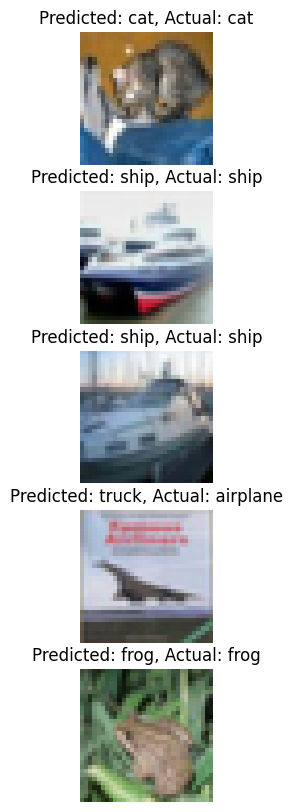

In [46]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    img = test_images[i]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    plt.imshow(test_images[i])
    plt.title("Predicted: {}, Actual: {}".format(class_names[predicted_class], class_names[test_labels[i][0]]))
    plt.axis('off')
plt.show()